In [128]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, KFold
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.decomposition import PCA
import umap
import json

from tqdm import tqdm

In [155]:

fdir_raw = Path("../data/raw/")
fdir_processed = Path("../data/interim")
fdir_traintest = Path("../data/processed") / 'sex'
fdir_external = Path("../data/external")

use_CV = True

model_type = 'catboost'
model_type = 'xgboost'

feature_importance_method = 'native'
feature_importance_method = 'SHAP'

sex = 'chrX'

n_features = 50


In [156]:

data = pd.read_hdf(fdir_traintest / f'geuvadis.preprocessed.sex.h5', key=sex)

features = pd.read_hdf(
    fdir_processed / f'feature_importance.{model_type}.sex.h5',
    key=f'{sex}',
)

features = features[feature_importance_method]
features = features.sort_values(ascending=False)

data_heart = pd.read_hdf(fdir_external / 'HEART' / 'reg' / "heart.merged.TPM.processed.h5", index_col=0)
data_heart_header = pd.read_csv(fdir_external / 'HEART' / 'reg' / 'SraRunTable.txt', sep=',')
data_heart_header.set_index("Run", inplace=True)



In [157]:
header = pd.read_hdf(fdir_processed/'geuvadis.preprocessed.h5', key='header')

data = data[features.iloc[:n_features].index]
data['Sex'] = header['Sex']

(667, 51)

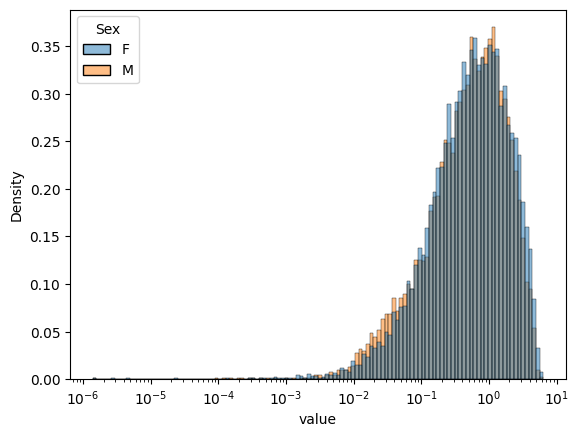

In [158]:
sns.histplot(data.melt('Sex'), x='value', hue='Sex', log_scale=True,
             stat='density')
data.shape

<Axes: xlabel='value', ylabel='Count'>

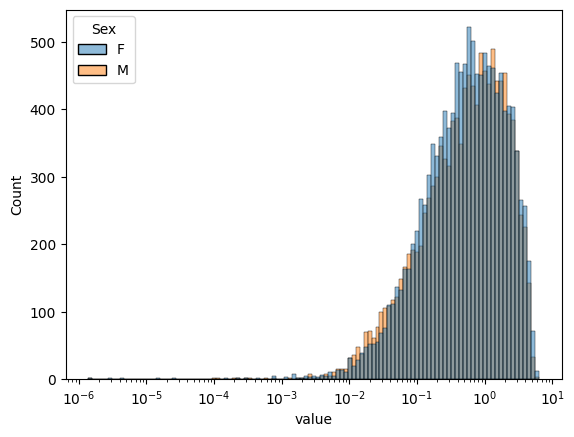

In [159]:
data = pd.read_hdf(fdir_traintest / f'geuvadis.preprocessed.sex.h5', key=sex)
data['Sex'] = header['Sex']

features = features.loc[features.index.intersection(data_heart.columns)]
features = features.sort_values(ascending=False)
features = features.iloc[:n_features]

# features
sns.histplot(data[features.index.union(["Sex"])].melt("Sex"), x='value', hue='Sex', log_scale=True)


In [160]:
features.index

Index(['MSTRG.36020.14', 'ENST00000602495.1', 'ENST00000647913.2',
       'ENST00000675525.1', 'ENST00000300184.8', 'MSTRG.35413.93',
       'ENST00000674495.1', 'ENST00000307259.9', 'MSTRG.1913.3',
       'ENST00000395951.7', 'MSTRG.6947.25', 'MSTRG.11270.12', 'MSTRG.25537.5',
       'MSTRG.35304.6', 'ENST00000581031.5', 'MSTRG.23288.2',
       'ENST00000602697.1', 'ENST00000504553.2', 'MSTRG.5140.8',
       'MSTRG.8633.24', 'ENST00000432750.5', 'ENST00000381177.7',
       'MSTRG.31758.3', 'ENST00000569205.5', 'MSTRG.13625.3',
       'ENST00000470355.1', 'MSTRG.29821.9', 'ENST00000700905.1',
       'MSTRG.8485.2', 'ENST00000601538.6', 'ENST00000402105.7',
       'ENST00000491328.1', 'ENST00000534139.5', 'ENST00000587012.1',
       'ENST00000477689.2', 'MSTRG.7480.16', 'ENST00000438666.7',
       'MSTRG.16481.13', 'MSTRG.21565.12', 'MSTRG.35846.26', 'MSTRG.18760.13',
       'MSTRG.2241.18', 'MSTRG.600.8', 'ENST00000368006.8', 'MSTRG.12458.9',
       'MSTRG.21565.11', 'ENST00000473781.1

<Axes: xlabel='value', ylabel='Count'>

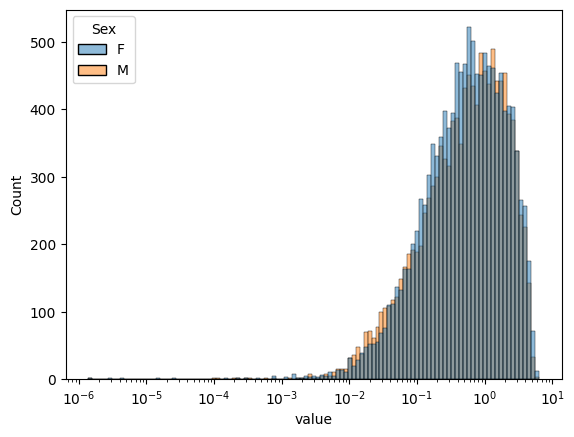

In [161]:

# features
sns.histplot(data[features.index.union(["Sex"])].melt("Sex"), x='value', hue='Sex', log_scale=True)
# features.shape

In [162]:
data_heart['Sex'] = data_heart_header['sex']

(20, 102379)

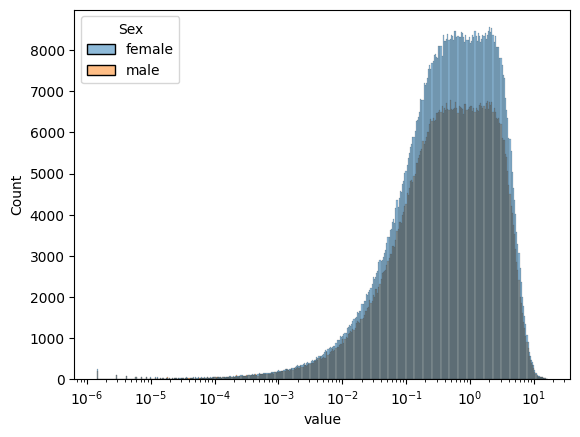

In [163]:
sns.histplot(data_heart.melt('Sex'), x='value', hue='Sex', log_scale=True)
data_heart.shape